In [ ]:
import pandas as pd
import numpy as np
from numpy.random import randint, rand
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Link προς το csv αρχείο
url = 'https://raw.githubusercontent.com/vgkourgkoutas/Computational_Intelligence/main/iphi2802.csv'
# Διαβάζουμε το αρχείο CSV με τις επιγραφές και τις χρονολογίες
data = pd.read_csv(url, delimiter='\t')

# Φιλτράρισμα για region_main_id=1693
filtered_data = data[data['region_main_id'] == 1693]

print(filtered_data)




          id                                               text  \
44    319963                                   μαναημος. σιμων.   
57    321542  εισιν εν τη αψιδι κρηπιδες εξ διαφερουσαι αιδε...   
84    304932  εξεδρων δυειν εκ τουδε του σπηλαιου του ταφαιω...   
126   320648     αχρι απεψηφισαμεν εριδιν ποκων ελογισθη κερμα.   
170   319977  ---------------- παρασταρωμανω ιατρος ο φιλοχρ...   
...      ...                                                ...   
2735  243502                ετους αγορανομουντος ακαμαντος μνα.   
2737  340779                                       [-- τεκ]νυς.   
2767  343270  [ εις θε]ος ο παντω[ν δε]σποτης. μνημιον σωφρο...   
2771  305225  [επι του ο]σιωτατου επισκοπου κλα[υ]διου ε[γ]ε...   
2782  304885  η βουλ[η και ο δημος ι]ουλιον αυρηλιο[ν σαλαμα...   

                                               metadata  region_main_id  \
44    Pal. — Jericho — 10-74 AD — BASOR 235 (1979) 3...            1693   
57    Pal. — Beth She‘arim — 3rd/4th c. AD — 

In [ ]:
# Δημιουργία λίστας επιγραφών
inscriptions = filtered_data['text'].tolist()

print(inscriptions)


['μαναημος. σιμων.', 'εισιν εν τη αψιδι κρηπιδες εξ διαφερουσαι αιδεσιω.', 'εξεδρων δυειν εκ τουδε του σπηλαιου του ταφαιωνος εισιοντων το του σπηλαιου θυρωμα εν δεξιοις και εωνιμοις συν δικαιοις πασι εξεχωρησεν ιουλιος αυρηλιος ιεδειβηλος αβισαμαια του μαλχη ιουλια αυρηλια αμαθη βολαζαιου του μοκιμου αυτη τε και υιοις και υωνοις εις το παντελες μηνι δαισιω του ετους.', 'αχρι απεψηφισαμεν εριδιν ποκων ελογισθη κερμα.', '---------------- παρασταρωμανω ιατρος ο φιλοχριστος γεβαλων και τενου εις τας εξοδους και εισοδους αυτου.', 'βαριβα μαρωνας εζη ετων.', 'αυρηλιος σεπτιμιος ευτυχ[ου] υιος ειρηναιος κολων λαο[δι]κευς μητροπολειτης κα[ι] αλλων πολεων πολειτης μ[ο]νος εγω εκ της εαυτου πατριδ[ος] απο πασης κρισεως αγωνισαμενος και νεικησας τους υποτεταγμενους αγωνας εν αυγουστη καισαρεια σεουηρειον οικουμενικον πυθικον πυγμην αυγουστου ακτια εν νεικοπολει της περιοδου παιδων πυγμην εν καισαρεια ισακτιον παιδων πυγμην εν τυρω ηρακλεια κομμοδεια παιδων πυγμην εν ταρσω ισολυμπιον οικουμενικον

In [ ]:
# Δημιοργία του μοντέλου BoW (Bag of Words) με unigrams με κωδικοποίηση TF-IDF
vectorizer = TfidfVectorizer(analyzer='word')
vectorized_inscriptions = vectorizer.fit_transform(inscriptions)

# Δημιουργία λεξικού με 1678 tokens
dictionary = {i + 1: word for i, word in enumerate(vectorizer.get_feature_names_out())}

print(dictionary)


{1: 'αβ', 2: 'αββεος', 3: 'αβδαασθωρης', 4: 'αβδαιου', 5: 'αβδαλγην', 6: 'αβδας', 7: 'αβδασσει', 8: 'αβιζιγηρης', 9: 'αβισαμαια', 10: 'αγαθη', 11: 'αγαθοι', 12: 'αγαθοκ', 13: 'αγαθου', 14: 'αγαθους', 15: 'αγειν', 16: 'αγενειων', 17: 'αγηνωρ', 18: 'αγια', 19: 'αγιας', 20: 'αγιε', 21: 'αγιο', 22: 'αγιος', 23: 'αγιου', 24: 'αγιοφορον', 25: 'αγιω', 26: 'αγιωι', 27: 'αγιων', 28: 'αγιωτατης', 29: 'αγιωτατου', 30: 'αγορανομουντο', 31: 'αγορανομουντος', 32: 'αγουστας', 33: 'αγουστω', 34: 'αγωνας', 35: 'αγωνισαμενος', 36: 'αδανα', 37: 'αδδεος', 38: 'αδελφης', 39: 'αδελφο', 40: 'αδελφου', 41: 'αδελφων', 42: 'αδικηθεις', 43: 'αδικησας', 44: 'αδικοι', 45: 'αδρια', 46: 'αετιου', 47: 'αζεο', 48: 'αζιζεου', 49: 'αηλιας', 50: 'αηουμας', 51: 'αθαν', 52: 'αθανα', 53: 'αθανατος', 54: 'αθανοτας', 55: 'αθη', 56: 'αι', 57: 'αιγαιας', 58: 'αιδεσιω', 59: 'αιμιλιον', 60: 'αινον', 61: 'αιον', 62: 'αιου', 63: 'αιρεσιν', 64: 'αιων', 65: 'αιωνι', 66: 'αιωνιου', 67: 'ακαβου', 68: 'ακαμαντος', 69: 'ακτια', 70: 'αλης

In [ ]:
# Μετατροπή του λεξικού σε δυαδική κωδικοποίηση
binary_dictionary = {format(i + 1, '011b'): word for i, word in enumerate(vectorizer.get_feature_names_out())}

print(binary_dictionary)

{'00000000001': 'αβ', '00000000010': 'αββεος', '00000000011': 'αβδαασθωρης', '00000000100': 'αβδαιου', '00000000101': 'αβδαλγην', '00000000110': 'αβδας', '00000000111': 'αβδασσει', '00000001000': 'αβιζιγηρης', '00000001001': 'αβισαμαια', '00000001010': 'αγαθη', '00000001011': 'αγαθοι', '00000001100': 'αγαθοκ', '00000001101': 'αγαθου', '00000001110': 'αγαθους', '00000001111': 'αγειν', '00000010000': 'αγενειων', '00000010001': 'αγηνωρ', '00000010010': 'αγια', '00000010011': 'αγιας', '00000010100': 'αγιε', '00000010101': 'αγιο', '00000010110': 'αγιος', '00000010111': 'αγιου', '00000011000': 'αγιοφορον', '00000011001': 'αγιω', '00000011010': 'αγιωι', '00000011011': 'αγιων', '00000011100': 'αγιωτατης', '00000011101': 'αγιωτατου', '00000011110': 'αγορανομουντο', '00000011111': 'αγορανομουντος', '00000100000': 'αγουστας', '00000100001': 'αγουστω', '00000100010': 'αγωνας', '00000100011': 'αγωνισαμενος', '00000100100': 'αδανα', '00000100101': 'αδδεος', '00000100110': 'αδελφης', '00000100111': '

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Link προς το csv αρχείο
url = 'https://raw.githubusercontent.com/vgkourgkoutas/Computational_Intelligence/main/iphi2802.csv'
# Διαβάζουμε το αρχείο CSV με τις επιγραφές και τις χρονολογίες
data = pd.read_csv(url, delimiter='\t')

# Φιλτράρισμα για region_main_id=1693
filtered_data = data[data['region_main_id'] == 1693]

# Δημιουργία λίστας επιγραφών
inscriptions = filtered_data['text'].tolist()

# Δημιουργία του μοντέλου TF-IDF
vectorizer = TfidfVectorizer(analyzer='word')
vectorized_inscriptions = vectorizer.fit_transform(inscriptions)

# Δοσμένη επιγραφή
given_inscription = "αλεξανδρε ουδις"
vectorized_given_inscription = vectorizer.transform([given_inscription])

# Υπολογισμός ομοιότητας συνημιτόνου
cosine_similarities = cosine_similarity(vectorized_given_inscription, vectorized_inscriptions).flatten()

# Εύρεση των top-5 ή top-10 πιο κοντινών επιγραφών
top_n = 5  # Αλλαγή σε 5 για top-5
top_indices = cosine_similarities.argsort()[-top_n:][::-1]

# Εκτύπωση των πιο κοντινών επιγραφών
print(f"Top-{top_n} πιο κοντινές επιγραφές:")
for index in top_indices:
    print(f"Επιγραφή: {inscriptions[index]}, Ομοιότητα: {cosine_similarities[index]}")


Top-5 πιο κοντινές επιγραφές:
Επιγραφή: μνεμιον πετρος οτιο ετους τκβ περετιου. θαρσι ουδις αθανοτας. θανοντ[ος] ας ετων θαρσι ουδις αθανατος., Ομοιότητα: 0.4501059619479762
Επιγραφή: μνημιον πετρου ουλπιανου αποθανοντος ετων εξηκοντα εν ετι σπγ εν μηνι ξανθικω λ θαρσι ουδις αθανατος., Ομοιότητα: 0.26535172955180475
Επιγραφή: εις θεος ο παντων δεσποτης. μνημιον ελλαδιου σαβα αποθανοντος μετα καλου ονοματος και καλης πιστεως ετων δ μηνος διου ε ημερα του. θαρσι ουδις αθανατος., Ομοιότητα: 0.23306175081851757
Επιγραφή: η βουλ[η και ο δημος ι]ουλιον αυρηλιο[ν σαλαμα]λλαθον μαλη [του αβδαιου α]ρχεμπορον ανακομισ[αντα την συν]οδιαν προικα εξ ιδ[ιων] τειμης χαριν ετους., Ομοιότητα: 0.0
Επιγραφή: μνησθη αννιανος δοφλικαρις ο επισταθις του εργου και ευειλατον ε[χ]ο[ι] την θεαν., Ομοιότητα: 0.0


Generation 0: Average Fitness = 0.147, Best Fitness = 0.242
Generation:0, new best f(['00100011100', '00110001111']) = 0.154
Generation:0, new best f(['01110000111', '10110011100']) = 0.157
Generation:0, new best f(['00011011000', '00000010001']) = 0.187
Generation:0, new best f(['01101101001', '01100011011']) = 0.206
Generation:0, new best f(['01001101011', '10100100100']) = 0.209
Generation:0, new best f(['01101000000', '01110101001']) = 0.221
Generation:0, new best f(['01111100011', '01100100000']) = 0.225
Generation:0, new best f(['00001100000', '10101100111']) = 0.240
Generation:0, new best f(['10001100110', '11000011111']) = 0.242
Generation 1: Average Fitness = 0.174, Best Fitness = 0.240
Generation 2: Average Fitness = 0.194, Best Fitness = 0.240
Generation 3: Average Fitness = 0.207, Best Fitness = 0.248
Generation:3, new best f(['01111100100', '10000111000']) = 0.248
Generation 4: Average Fitness = 0.219, Best Fitness = 0.248
Generation 5: Average Fitness = 0.230, Best Fitnes

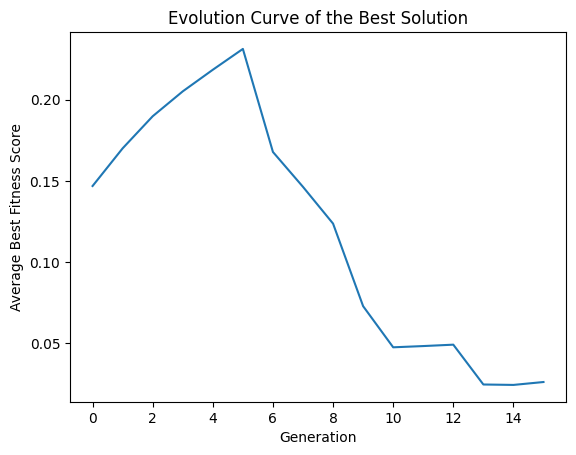

In [8]:
import pandas as pd
import numpy as np
from numpy.random import randint, rand
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Link προς το csv αρχείο
url = 'https://raw.githubusercontent.com/vgkourgkoutas/Computational_Intelligence/main/iphi2802.csv'
# Διαβάζουμε το αρχείο CSV με τις επιγραφές και τις χρονολογίες
data = pd.read_csv(url, delimiter='\t')

# Φιλτράρισμα για region_main_id=1693
filtered_data = data[data['region_main_id'] == 1693]

# Δημιουργία λίστας επιγραφών
inscriptions = filtered_data['text'].tolist()

# Δημιουργία του μοντέλου BoW (Bag of Words) με unigrams με κωδικοποίηση TF-IDF
vectorizer = TfidfVectorizer(analyzer='word')
vectorized_inscriptions = vectorizer.fit_transform(inscriptions)

# Δημιουργία λεξικού με τις 1678 σημαντικότερες λέξεις και τη δυαδική τους κωδικοποίηση
dictionary = {i + 1: word for i, word in enumerate(vectorizer.get_feature_names_out())}
reverse_binary_dictionary = {format(i + 1, '011b'): word for i, word in enumerate(vectorizer.get_feature_names_out())}

# Συνάρτηση για την κατασκευή της συμπληρωμένης επιγραφής
def construct_inscription(missing_words, reverse_binary_dictionary, inscription):
    words = [reverse_binary_dictionary[word] for word in missing_words if word in reverse_binary_dictionary]
    return inscription.replace('[...]', ' '.join(words), 1)

# Συνάρτηση υπολογισμού ομοιότητας
def compute_similarity(complete_inscription, inscriptions, vectorizer):
    vectorized_inscriptions = vectorizer.transform(inscriptions + [complete_inscription])
    similarities = cosine_similarity(vectorized_inscriptions[-1:], vectorized_inscriptions[:-1])
    return similarities.flatten()

# Συνάρτηση καταλληλότητας
def fitness_function(complete_inscription, inscriptions, vectorizer, top_n=5):
    similarities = compute_similarity(complete_inscription, inscriptions, vectorizer)
    top_indices = similarities.argsort()[-top_n:][::-1]
    top_similarities = similarities[top_indices]
    return np.mean(top_similarities)

# Συνάρτηση στόχος
def objective(missing_words, reverse_binary_dictionary, inscription, inscriptions, vectorizer):
    complete_inscription = construct_inscription(missing_words, reverse_binary_dictionary, inscription)
    return fitness_function(complete_inscription, inscriptions, vectorizer)

# Επιλογή με τουρνουά
def selection(pop, scores, k=3):
    selection_ix = randint(len(pop))
    for ix in randint(0, len(pop), k-1):
        if scores[ix] > scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

# Διασταύρωση δύο γονέων με χρήση modulo
def crossover(p1, p2, r_cross):
    c1, c2 = p1.copy(), p2.copy()
    if rand() < r_cross:
        pt = randint(1, len(p1))
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
        # Χρήση modulo για να διασφαλιστεί ότι οι νέες τιμές είναι εντός του εύρους
        c1 = [format((int(word, 2) % 1678) + 1, '011b') for word in c1]
        c2 = [format((int(word, 2) % 1678) + 1, '011b') for word in c2]
    return [c1, c2]

# Μετάλλαξη ατόμου με χρήση modulo operation
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        if rand() < r_mut:
            # Δημιουργία νέας τυχαίας τιμής εντός του εύρους [1, 1678]
            new_value = randint(1, 1679)
            # Χρήση modulo για να διασφαλιστεί ότι η νέα τιμή είναι εντός του εύρους
            bitstring[i] = format(new_value % 1678 + 1, '011b')

# Γενετικός αλγόριθμος
def genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut, reverse_binary_dictionary, inscription, inscriptions, patience=10):
    pop = [[format(randint(1, 1679), '011b') for _ in range(n_bits)] for _ in range(n_pop)]  # Αρχικός πληθυσμός με δυαδική κωδικοποίηση
    vectorizer = TfidfVectorizer().fit(inscriptions)
    best, best_eval = pop[0], objective(pop[0], reverse_binary_dictionary, inscription, inscriptions, vectorizer)

    # Αποθήκευση της μέσης τιμής της καλύτερης λύσης σε κάθε γενιά
    avg_best_scores = []

    # Αρχικοποίηση για το κριτήριο τερματισμού
    no_improvement_count = 0

    for gen in range(n_iter):
        scores = [objective(c, reverse_binary_dictionary, inscription, inscriptions, vectorizer) for c in pop]

        # Υπολογισμός μέσου όρου και καλύτερου fitness score
        avg_score = np.mean(scores)
        best_gen_score = max(scores)

        avg_best_scores.append(avg_score)

        print(f"Generation {gen}: Average Fitness = {avg_score:.3f}, Best Fitness = {best_gen_score:.3f}")

        for i in range(n_pop):
            if scores[i] > best_eval:
                best, best_eval = pop[i], scores[i]
                print("Generation:%d, new best f(%s) = %.3f" % (gen, pop[i], scores[i]))
                no_improvement_count = 0
            else:
                no_improvement_count += 1
        # Εάν δεν υπάρξει βελτίωση ενεργοποιείται το κριτήριο τερματισμού και σταματά η εκτέλεση του γενετικού αλγορίθμου
        if no_improvement_count >= patience:
            print("No improvement for %d generations, stopping early." % patience)
            break

        selected = [selection(pop, scores) for _ in range(n_pop)]
        children = []
        for i in range(0, n_pop, 2):
            p1, p2 = selected[i], selected[i+1]
            for c in crossover(p1, p2, r_cross):
                mutation(c, r_mut)
                children.append(c)
        pop = children

    return best, best_eval, gen, avg_best_scores


inscription = "[...] αλεξανδρε ουδις [...]"  # Φθαρμένη επιγραφή

# Παράμετροι
n_bits = 2  # Δύο λέξεις που λείπουν
n_iter = 1000 # Αριθμός για τον οποίο θα επαναληφθεί ο γενετικός αλγόριθμος αν δεν ισχύει το κριτήριο τερματισμού
n_pop = 200     # Ο πληθυσμός του γενετικού μας αλγορίθμου
r_cross = 0.1   # Η πιθανότητα διασταύρωσης
r_mut = 0.01    # Η πιθανότητα μετάλλαξης
patience = 1000  # Αριθμός γενεών χωρίς βελτίωση

# Εκτέλεση του γενετικού αλγορίθμου 10 φορές
best_scores = []
generations = []
all_avg_best_scores = []
#Εκτέλεση του γενετικού αλγορίθμου για δέκα φορές
for run in range(10):
    best, score, gen, avg_best_scores = genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut, reverse_binary_dictionary, inscription, inscriptions, patience)
    best_scores.append(score)
    generations.append(gen)
    all_avg_best_scores.append(avg_best_scores)
    best_words = [reverse_binary_dictionary[word] for word in best]
    print(f'Run {run + 1}: Best words: {best_words} with similarity score: {score} in {gen} generations')

# Υπολογισμός του μέσου όρου των βέλτιστων τιμών και του μέσου όρου των γενεών
average_best_score = np.mean(best_scores)
average_generations = np.mean(generations)

print(f'\nAverage best similarity score: {average_best_score}')
print(f'Average number of generations: {average_generations}')

# Κανονικοποίηση του μήκους των λιστών avg_best_scores ώστε να έχουν όλες το ίδιο μήκος και να αποτυπώσουμε την γραφική μας παράσταση
max_length = max(len(scores) for scores in all_avg_best_scores)
for i in range(len(all_avg_best_scores)):
    if len(all_avg_best_scores[i]) < max_length:
        all_avg_best_scores[i] += [0] * (max_length - len(all_avg_best_scores[i]))

# Υπολογισμός μέσης τιμής της απόδοσης της καλύτερης λύσης σε κάθε γενιά
avg_best_scores_across_runs = np.mean(all_avg_best_scores, axis=0)

# Σχεδιασμός της καμπύλης εξέλιξης
plt.plot(avg_best_scores_across_runs)
plt.xlabel('Generation')
plt.ylabel('Average Best Fitness Score')
plt.title('Evolution Curve of the Best Solution')
plt.show()
